In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the paths to the image folders
fake_folders = [
    'C:/Users/User/Desktop/dataton/techosmotr/techosmotr/train/fictivniye(fictitious)/2-from-the-screen',
    'C:/Users/User/Desktop/dataton/techosmotr/techosmotr/train/fictivniye(fictitious)/3-from-the-screen+photoshop',
    'C:/Users/User/Desktop/dataton/techosmotr/techosmotr/train/fictivniye(fictitious)/4-photoshop'
]
real_folder = 'C:/Users/User/Desktop/dataton/techosmotr/techosmotr/train/pravilniye(correct)/0-correct'

# Load and preprocess images
def load_and_preprocess_images(folder_paths, label):
    images = []
    labels = []
    for folder_path in folder_paths:
        for filename in os.listdir(folder_path):
            if filename.endswith('.jpeg'):
                img = cv2.imread(os.path.join(folder_path, filename))
                img = cv2.resize(img, (64, 64))  # Resize to 64x64 pixels
                img = img / 255.0  # Normalize pixel values
                images.append(img)                
                labels.append(label)  
    return np.array(images), np.array(labels)

# Load and preprocess fake images
fake_images, fake_labels = load_and_preprocess_images(fake_folders, label=1)

# Load and preprocess real images
real_images, real_labels = load_and_preprocess_images([real_folder], label=0)

# Combine fake and real images and labels
X = np.concatenate((fake_images, real_images))
y = np.concatenate((fake_labels, real_labels))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the CNN model (same as before)
model_1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model_1.evaluate(X_test, y_test, verbose=0)


Epoch 1/10
180/180 [==============================] - 11s 58ms/step - loss: 0.2647 - accuracy: 0.8890 - val_loss: 0.1801 - val_accuracy: 0.9234
Epoch 2/10
180/180 [==============================] - 10s 56ms/step - loss: 0.1370 - accuracy: 0.9486 - val_loss: 0.2065 - val_accuracy: 0.9266
Epoch 3/10
180/180 [==============================] - 10s 56ms/step - loss: 0.1067 - accuracy: 0.9601 - val_loss: 0.1443 - val_accuracy: 0.9500
Epoch 4/10
180/180 [==============================] - 10s 57ms/step - loss: 0.0816 - accuracy: 0.9726 - val_loss: 0.1356 - val_accuracy: 0.9516
Epoch 5/10
180/180 [==============================] - 10s 57ms/step - loss: 0.0591 - accuracy: 0.9792 - val_loss: 0.1337 - val_accuracy: 0.9453
Epoch 6/10
180/180 [==============================] - 10s 57ms/step - loss: 0.0437 - accuracy: 0.9851 - val_loss: 0.1397 - val_accuracy: 0.9563
Epoch 7/10
180/180 [==============================] - 10s 57ms/step - loss: 0.0294 - accuracy: 0.9898 - val_loss: 0.1850 - val_accuracy:

In [2]:
y_test.shape

(640,)

In [3]:
model_1.evaluate(X_test, y_test)

20/20 [==============================] - 0s 12ms/step - loss: 0.1685 - accuracy: 0.9625


[0.16847684979438782, 0.9624999761581421]

In [4]:
model_1.fit(X_test, y_test, epochs=10, batch_size=32)

Epoch 1/10
20/20 [==============================] - 1s 56ms/step - loss: 0.1436 - accuracy: 0.9547
Epoch 2/10
20/20 [==============================] - 1s 57ms/step - loss: 0.0489 - accuracy: 0.9781
Epoch 3/10
20/20 [==============================] - 1s 57ms/step - loss: 0.0230 - accuracy: 0.9922
Epoch 4/10
20/20 [==============================] - 1s 55ms/step - loss: 0.0164 - accuracy: 0.9969
Epoch 5/10
20/20 [==============================] - 1s 55ms/step - loss: 0.0125 - accuracy: 0.9969
Epoch 6/10
20/20 [==============================] - 1s 56ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 1s 56ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 8/10
20/20 [==============================] - 1s 56ms/step - loss: 0.0046 - accuracy: 0.9984
Epoch 9/10
20/20 [==============================] - 1s 56ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 10/10
20/20 [==============================] - 1s 57ms/step - loss: 0.0010 - accuracy: 1.0000


In [5]:
test_folder = 'C:/Users/User/Desktop/dataton/techosmotr/techosmotr/test'

test_images, test_labels = load_and_preprocess_images([test_folder], 3)

In [6]:
predictions = model_1.predict(test_images)
predictions[:5]

25/25 [==============================] - 0s 14ms/step


array([[9.9971294e-01],
       [3.8756810e-02],
       [9.9999076e-01],
       [3.1493648e-09],
       [5.6738346e-03]], dtype=float32)

In [7]:
overall_count = len(predictions)
count_p = 0
count_n = 0
for p in predictions:
    if p >= 0.6:
        count_p += 1
    elif p<= 0.4:
        count_n += 1
        
(overall_count, count_p, count_n)

(777, 282, 488)

20/20 [==============================] - 0s 15ms/step


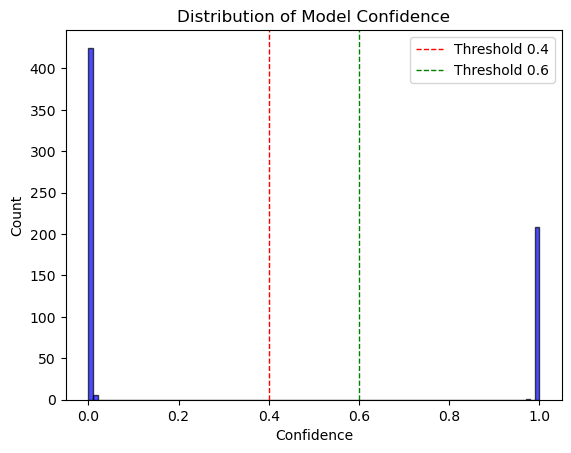

In [8]:
import matplotlib.pyplot as plt

# Assuming `predictions` is a numpy array of probabilities
# Replace this with your actual array of probabilities

predictions = model_1.predict(X_test)
predictions = predictions.flatten()  # Flatten to 1D array
predictions[:5]  # Display first 5 predictions as a check

# Set up bins
bins = np.linspace(0, 1, 100)

# Create histogram
plt.hist(predictions, bins=bins, edgecolor='k', alpha=0.7, color='blue')

# Add labels and title
plt.xlabel('Confidence')
plt.ylabel('Count')
plt.title('Distribution of Model Confidence')

# Add vertical lines for threshold values
plt.axvline(x=0.4, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x=0.6, color='green', linestyle='dashed', linewidth=1)

# Add legend
plt.legend(['Threshold 0.4', 'Threshold 0.6'])

# Show plot
plt.show()


In [9]:
threshold = 0.1
pred_labels = []
for p in predictions:
    if p < 0.5:
        pred_labels.append(0)
    else:
        pred_labels.append(1)
        
assert len(pred_labels) == len(predictions)

In [23]:
import os
import pandas as pd
import cv2
import numpy as np

# Load and preprocess images
def load_and_preprocess_test_images(folder_path):
    images = []
    indices = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpeg'):
            index = int(filename.split('.')[0])  # Extract index from filename
            indices.append(index)
            img = cv2.imread(os.path.join(folder_path, filename))
            img = cv2.resize(img, (64, 64))  # Resize to 64x64 pixels
            img = img / 255.0  # Normalize pixel values
            images.append(img)
    return np.array(images), np.array(indices)

# Define the path to the test image folder
test_folder = 'C:/Users/User/Desktop/dataton/techosmotr/techosmotr/test/'

# Load and preprocess test images
test_images, test_indices = load_and_preprocess_test_images(test_folder)

# Predict labels
predictions = model_1.predict(test_images)
predicted_labels = (predictions > 0.1).astype(int).flatten()

# Create a DataFrame with indices and predicted labels
results_df = pd.DataFrame({'file_index': test_indices, 'class': predicted_labels})

# Save the results to a CSV file
results_df.to_csv('test_predictions1.csv', index=False)


25/25 [==============================] - 0s 16ms/step


PermissionError: [Errno 13] Permission denied: 'test_predictions1.csv'

In [11]:
import pandas as pd

# Load the CSV file into a DataFrame
results_df = pd.read_csv('test_predictions1.csv')

# Display the first few rows
print(results_df)


     file_index  class
0      70007467      1
1      70007765      0
2      70014532      1
3      70015236      0
4      70038388      0
..          ...    ...
772    79977891      0
773    79978268      1
774    79982298      0
775    79991111      0
776    79998230      0

[777 rows x 2 columns]


In [12]:
df = pd.read_csv('C:/Users/User/Desktop/dataton/annotations.csv')

In [13]:
image_folder = 'C:/Users/User/Desktop/dataton/techosmotr/techosmotr/train/pravilniye(correct)/0-correct/'
df['annotation_id'] = df['annotation_id'].astype(str) 
df['image_path'] = image_folder + df['annotation_id']

In [14]:
# Define the CNN model
model_2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.15),
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [16]:
history = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
180/180 [==============================] - 11s 59ms/step - loss: 0.3345 - accuracy: 0.8559 - val_loss: 0.1878 - val_accuracy: 0.9187
Epoch 2/10
180/180 [==============================] - 10s 58ms/step - loss: 0.1515 - accuracy: 0.9424 - val_loss: 0.1539 - val_accuracy: 0.9359
Epoch 3/10
180/180 [==============================] - 10s 57ms/step - loss: 0.1113 - accuracy: 0.9590 - val_loss: 0.1682 - val_accuracy: 0.9453
Epoch 4/10
180/180 [==============================] - 11s 59ms/step - loss: 0.0966 - accuracy: 0.9634 - val_loss: 0.1305 - val_accuracy: 0.9484
Epoch 5/10
180/180 [==============================] - 11s 59ms/step - loss: 0.0718 - accuracy: 0.9778 - val_loss: 0.1939 - val_accuracy: 0.9406
Epoch 6/10
180/180 [==============================] - 11s 60ms/step - loss: 0.0588 - accuracy: 0.9783 - val_loss: 0.1316 - val_accuracy: 0.9516
Epoch 7/10
180/180 [==============================] - 11s 59ms/step - loss: 0.0428 - accuracy: 0.9840 - val_loss: 0.2077 - val_accuracy:

In [17]:
test_loss, test_accuracy = model_2.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9468749761581421


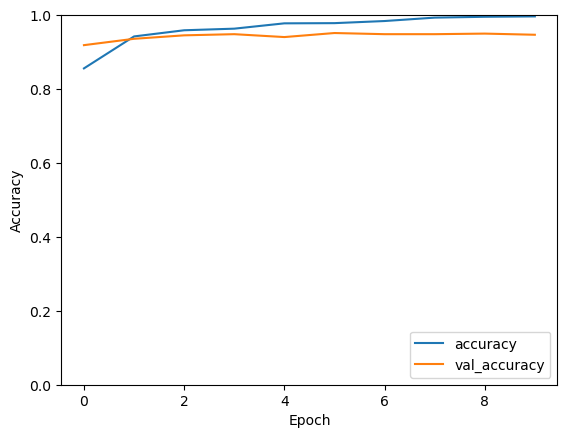

In [18]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [19]:
from sklearn.metrics import f1_score

# Assuming `model_1` is the model trained on the first fake folder
predictions_1 = model_1.predict(X_test)

# Assuming `model_2` is the model trained on the other three fake folders
predictions_2 = model_2.predict(X_test)

# Average predictions
final_predictions = (predictions_1 + predictions_2) / 2

# Convert probabilities to class labels (0 or 1)
final_predictions_labels = (final_predictions > 0.1).astype(int)

test_images, test_indices = load_and_preprocess_test_images(test_folder)

f1 = f1_score(y_test, final_predictions_labels)
print(f"F1 Score: {f1}")

20/20 [==============================] - 0s 13ms/step
F1 Score: 0.9766355140186915


In [20]:
# Assuming `test_indices` contains the indices for the test set
results_df = pd.DataFrame({'file_index': test_indices, 'class': final_predictions_labels.flatten()})
results_df.to_csv('test_predictions1.csv', index=False)

ValueError: All arrays must be of the same length

In [27]:
# Load and preprocess images
def load_and_preprocess_test_images(folder_path):
    images = []
    indices = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpeg'):
            index = int(filename.split('.')[0])  # Extract index from filename
            indices.append(index)
            img = cv2.imread(os.path.join(folder_path, filename))
            img = cv2.resize(img, (64, 64))  # Resize to 64x64 pixels
            img = img / 255.0  # Normalize pixel values
            images.append(img)
    return np.array(images), np.array(indices)

# Define the path to the test image folder
test_folder = 'C:/Users/User/Desktop/dataton/test_test/'

# Load and preprocess test images
test_images, test_indices = load_and_preprocess_test_images(test_folder)

# Predict labels
predictions = model_1.predict(test_images)
predicted_labels = (predictions > 0.1).astype(int).flatten()

# Create a DataFrame with indices and predicted labels
results_df = pd.DataFrame({'file_index': test_indices, 'class': predicted_labels})

# Save the results to a CSV file
results_df.to_csv('test_predictions3.csv', index=False)


1/1 [==============================] - 0s 41ms/step


In [30]:
# Load true labels from the provided CSV
true_labels_df = pd.read_csv('C:/Users/User/Desktop/dataton/test_predictions3.csv')  # Replace with actual path

# Merge true labels with predicted labels
merged_df = pd.merge(true_labels_df, results_df, on='file_index')

# Calculate accuracy
accuracy = (merged_df['class_x'] == merged_df['class_y']).mean()
print(f'Accuracy: {accuracy}')

# Calculate F1 score
from sklearn.metrics import f1_score

f1 = f1_score(merged_df['class_x'], merged_df['class_y'])
print(f'F1 Score: {f1}')

Accuracy: 1.0
F1 Score: 1.0
